In [1]:
## importing all libraries and dependencies
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
from random import sample
import math
from heapq import merge
from random import *
import secrets
from scipy.stats import spearmanr
from scipy import stats
import matplotlib.pyplot as plt

In [39]:
participants = []
all_within_bias = []
all_across_bias = []

## Edit for each participant

In [436]:
pt_num = '72.0'

## within across

In [437]:
pt_dt = 'C:/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/'
very_close = []
close = []
far = []
very_far = []

In [438]:
dt = pd.read_csv(pt_dt+"%s_ptsummary.csv"%pt_num)

In [439]:
shrt_df = pd.DataFrame({ 
                        'contxt1': dt.context_type,
                        'contxt2': dt.context_type2,
                        'context_shock':dt.context_shock,
                        'context_shock2':dt.context_shock2,
                        'cond1': dt.condition,
                        'cond2': dt.condition2,
                        'resp': dt.key_resp_keys,
                        'rt': dt.key_resp_rt})

In [440]:
within = []
across = []

rt_within = []
rt_across = []

for index, row in shrt_df.iterrows():
    resp_dt = shrt_df.resp
    resp_rt = shrt_df.rt
    if shrt_df.cond1[index] == 'within_threat1' and shrt_df.cond2[index] == 'within_threat2':
        within.append(resp_dt[index])
        rt_within.append(resp_rt[index])
        
    if shrt_df.cond1[index] == 'within_safe1' and shrt_df.cond2[index] == 'within_safe2':
        within.append(resp_dt[index])
        rt_within.append(resp_rt[index])
        
for index, row in shrt_df.iterrows():
    resp_dt = shrt_df.resp
    resp_rt = shrt_df.rt
    if shrt_df.cond1[index] == 'across_threat1' and shrt_df.cond2[index] == 'across_threat2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post':
        across.append(resp_dt[index])
        rt_across.append(resp_rt[index])
        
    if shrt_df.cond1[index] == 'across_threat1' and shrt_df.cond2[index] == 'across_safe2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post':
        across.append(resp_dt[index])
        rt_across.append(resp_rt[index])
        
    if shrt_df.cond1[index] == 'across_safe1' and shrt_df.cond2[index] == 'across_threat2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post':
        across.append(resp_dt[index])
        rt_across.append(resp_rt[index])
    
    if shrt_df.cond1[index] == 'across_safe1' and shrt_df.cond2[index] == 'across_safe2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post':
        across.append(resp_dt[index])
        rt_across.append(resp_rt[index])

In [441]:
within_close = []
across_close = []

for a in within:
    if a == 1 or a == 2:
        within_close.append(a)

for c in across:
    if c == 1 or c == 2:
        across_close.append(c)
        
within_bias = (len(within_close)/(len(within)))
all_within_bias.append(within_bias)

across_bias = (len(across_close)/(len(across)))
all_across_bias.append(across_bias)

participants.append(pt_num)

In [442]:
summarydf = pd.DataFrame({"Sub": participants,
                          "within_bias":all_within_bias,
                         "across_bias":all_across_bias})
summarydf.to_csv(pt_dt+"collapsed_td.csv", index = True, header = True )

In [2]:
res_csv = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/collapsed_td.csv')
b_df=res_csv

In [3]:
binry = pd.melt(res_csv, id_vars=['Sub'], value_vars=['within_bias', 'across_bias'], var_name='condition', value_name='resp_bias')

In [4]:
binry.loc[binry['condition'] == 'within_bias', 'test'] = '1within'
binry.loc[binry['condition'] == 'across_bias', 'test'] = '2across'

[]

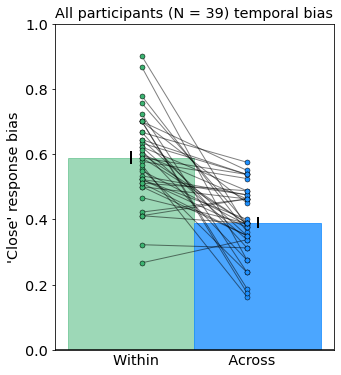

In [5]:
## within and across
totalpts = len(res_csv)
mediumseagreen = '#3CB371'
dodgerblue = '#1E90FF'
fig, ax = plt.subplots(figsize=(5, 6))

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(1) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, np.mean(res_csv.within_bias), width,
    color= mediumseagreen,
    #hatch = '.',
    edgecolor= mediumseagreen,
    alpha = 0.5,
    yerr=stats.sem(res_csv.within_bias),
    label = "Safe",
    error_kw=dict(elinewidth=2,ecolor= "black"))
ax.bar(ind+width,np.mean(res_csv.across_bias), width,
    color= dodgerblue,
    #hatch = '.',
    edgecolor= dodgerblue,
    alpha = 0.8,
    yerr=stats.sem(res_csv.across_bias),
    label = "Threat",
    error_kw=dict(elinewidth=2,ecolor= "black"))

#ax.legend()

##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2

     # Get the values for same_context and bound_context bias in each valence condition
h = res_csv.within_bias
d = res_csv.across_bias
     # Set up the x-axis values
x1 = i - 0.2
x2 = i + 0.2
line_color = ["black"]
line_colors = np.repeat(line_color, len(d))
alphas = [0.5]*len(line_colors)

     # Plot the lines connecting the dots
for hi, di, ci, ai in zip(h, d, line_colors, alphas):
    ax.plot([x1 + 0.03, x2 - 0.08], [hi, di], c=ci, alpha=ai, linewidth = 1)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
ax.scatter(len(h)*[x1+0.03], h, c=mediumseagreen, edgecolors= "black",
s=25, lw=0.5, zorder=10)
ax.scatter(len(d)*[x2-0.08], d, c=dodgerblue, edgecolors= "black",
s=25, lw=0.5, zorder=10)
#ax.legend(loc = 'lower left', fontsize = "large")

# Fix the axes and labels 
#legend_elements = []
plt.ylim(0, 1)
plt.xlabel("Within               Across", fontsize = "x-large")
plt.ylabel("'Close' response bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All participants (N = %s) temporal bias"%totalpts, fontsize = "x-large")
#plt.legend(handles=legend_elements, loc='center')
ax.xaxis.set_tick_params(labelbottom=False)
ax.set_xticks([])

## source memory

In [2]:
sum_srcdt = pd.read_csv('C:/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/SMsummary.csv')
sum_srcdt.head()
len(sum_srcdt)

39

No handles with labels found to put in legend.


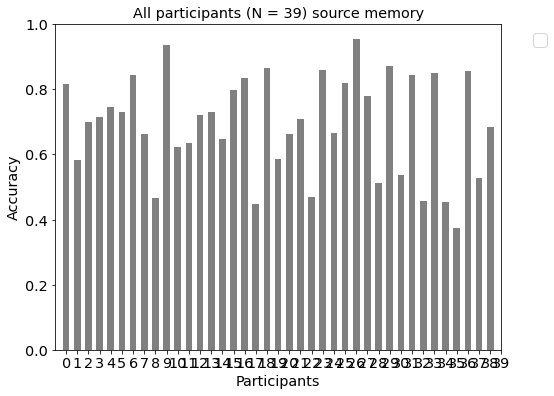

In [3]:
totalpts = len(sum_srcdt)
x_axis = np.arange(totalpts)

plt.subplots(figsize=(8, 6))
 
plt.bar(x_axis, sum_srcdt.Mean_accuracy, 0.6, color = "grey")

plt.xlabel("Participants", fontsize = "x-large")
plt.ylabel("Accuracy", fontsize = "x-large")
plt.title("All participants (N = %s) source memory"%totalpts, fontsize = "x-large")
x_range = range(0, totalpts + 1)
y_range = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.xlim (-1, 10)
plt.xticks(x_range, fontsize = "x-large")
plt.yticks(y_range, fontsize = "x-large")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize = 18)
#plt.xticks(x_range, fontsize = "x-large")
#plt.show()
plt.savefig('collapsed_srcmem.pdf')

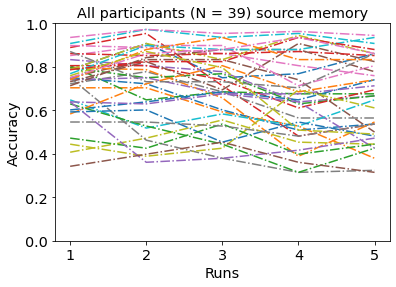

In [5]:
totalpts = len(sum_srcdt)
runs = [1,2,3,4,5]
for index, row in sum_srcdt.iterrows():
    b = sum_srcdt.Runs_SM[index]
    g= b.replace('[','')
    h = g.replace(']','')
    res = [float(idx) for idx in h.split(', ')]
    plt.plot(runs, res, linestyle="-.")
plt.title("All participants (N = %s) source memory"%totalpts, fontsize = "x-large")
plt.xlabel("Runs", fontsize = "x-large")
plt.ylabel("Accuracy", fontsize = "x-large")
plt.xticks(runs, fontsize = "x-large")
plt.yticks(y_range, fontsize = "x-large")
plt.ylim(0,1)
#plt.show()
plt.savefig('collapsed_srcmemRUN.pdf')